<a href="https://colab.research.google.com/github/dheerajkumar1a1a/Kaggle_github/blob/main/adf_potato_Shimla_prophet_multiv_rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default='plotly_white'
import os
import plotly.io as pio
pio.renderers.default = 'colab'
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("multi_shimla.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [ ]:
parent_df={}
parent_df['RANCHI']=pd.read_csv('complete_data.csv',index_col=0,parse_dates=[0])

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# sns.lineplot(data=parent_df['RANCHI'])

parent_df['RANCHI'].iplot()

In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Retail Prices','Arrival Quantity'])

In [ ]:
parent_df['RANCHI'].drop('2017-05-27',inplace=True)

In [ ]:
parent_df['RANCHI']

Arrival Quantity  Retail Prices  Min Price  Max Price  Modal Price
Date                                                                          
2002-01-01               NaN            NaN        NaN        NaN          NaN
2002-01-02               NaN            NaN        NaN        NaN          NaN
2002-01-03               NaN            NaN        NaN        NaN          NaN
2002-01-04              12.0            0.0      400.0      450.0        425.0
2002-01-05               NaN            NaN        NaN        NaN          NaN
...                      ...            ...        ...        ...          ...
2023-02-27               NaN            NaN        NaN        NaN          NaN
2023-02-28               NaN            NaN        NaN        NaN          NaN
2023-02-28               NaN            NaN        NaN        NaN          NaN
2023-02-28               NaN            NaN        NaN        NaN          NaN
2023-02-28               NaN            NaN        NaN        NaN          NaN

[7532 rows x 5 columns]

In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Retail Prices','Arrival Quantity'])

In [ ]:
parent_df['RANCHI']['Arrival Quantity'].fillna(-1,inplace=True)


In [ ]:
parent_df['RANCHI']=parent_df['RANCHI'][parent_df['RANCHI']['Arrival Quantity']<=60]


In [ ]:

px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Arrival Quantity'])


In [ ]:

parent_df['RANCHI']['Arrival Quantity'].replace(-1,np.nan,inplace=True)


In [ ]:

px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Arrival Quantity'])


<Axes: >

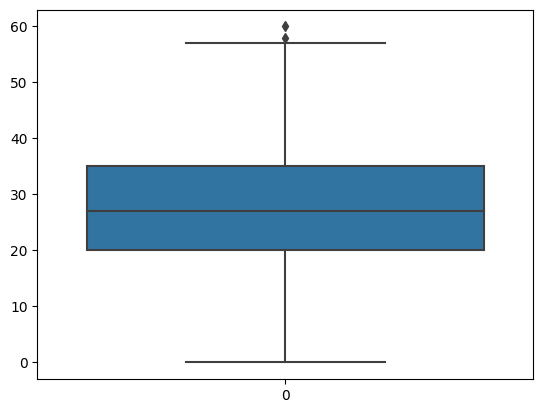

In [ ]:

sns.boxplot(data=parent_df['RANCHI']['Arrival Quantity'])


In [ ]:

parent_df['RANCHI'].loc[:,'Arrival Quantity'].describe()

count    5301.000000
mean       27.215808
std        11.290145
min         0.000000
25%        20.000000
50%        27.000000
75%        35.000000
max        60.000000
Name: Arrival Quantity, dtype: float64

In [ ]:
df_Ranchi=parent_df['RANCHI'].copy()

In [ ]:
df_Ranchi.loc[:,'Retail Prices'][(df_Ranchi['Retail Prices']>4000) & (df_Ranchi['Retail Prices']<5000)].head(60)

Series([], Name: Retail Prices, dtype: float64)

In [ ]:
df_Ranchi['2011':'2012'].describe()

Arrival Quantity  Retail Prices    Min Price    Max Price  Modal Price
count        580.000000     580.000000   580.000000   580.000000   580.000000
mean          25.960345    1556.724138  1054.870690  1208.525862  1134.017241
std            6.862842     671.044060   484.087225   520.207569   502.695652
min            3.000000     700.000000   200.000000   450.000000   425.000000
25%           21.000000    1000.000000   518.750000   625.000000   575.000000
50%           25.000000    1600.000000  1200.000000  1400.000000  1300.000000
75%           30.000000    2000.000000  1500.000000  1600.000000  1550.000000
max           50.000000   10000.000000  2200.000000  2500.000000  2400.000000

In [ ]:
df_Ranchi['2011':'2014']['Retail Prices'].iplot()

In [ ]:
df_Ranchi_1=df_Ranchi.copy()
df_Ranchi.isnull().sum()

Arrival Quantity    2218
Retail Prices       2218
Min Price           2218
Max Price           2218
Modal Price         2218
dtype: int64

In [ ]:
# https://www.ceicdata.com/en/india/retail-price-department-of-agriculture-and-cooperation-food-by-cities-tomato/retail-price-doac-tomato-jharkhand-ranchi
# above is the source provided to prove that 18k price is an outlier

df_Ranchi_1=df_Ranchi_1[df_Ranchi_1['Retail Prices']<=4000]
df_Ranchi_1.isnull().sum()
# df_Ranchi['Retail Prices'].iplot()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi=df_Ranchi['2010':'2020'].copy()


In [ ]:
df_Ranchi_1=df_Ranchi_1['2010':'2020'].copy()
df_Ranchi_1.isnull().sum()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi_dropped=df_Ranchi_1.dropna()

In [ ]:
df_Ranchi_dropped['Arrival Quantity']['2020'].iplot()

In [ ]:
df_Ranchi_dropped.iplot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

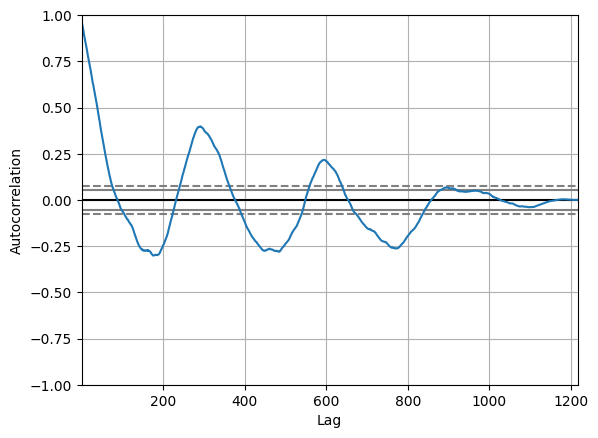

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Arrival Quantity'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

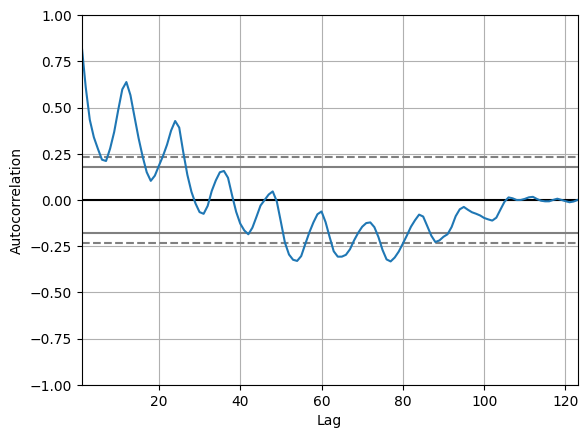

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2010':'2020']['Arrival Quantity'].resample('1m').mean())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

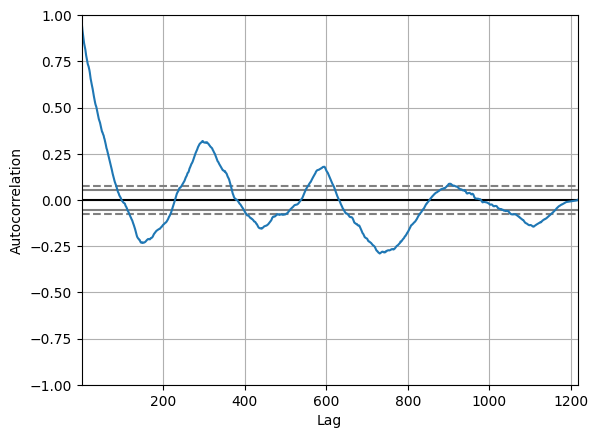

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

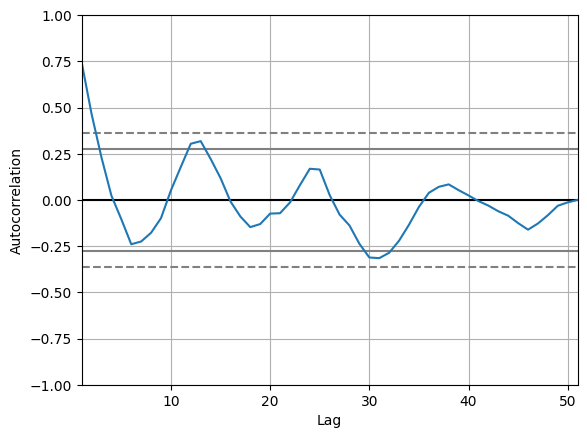

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'].resample('1m').mean())

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

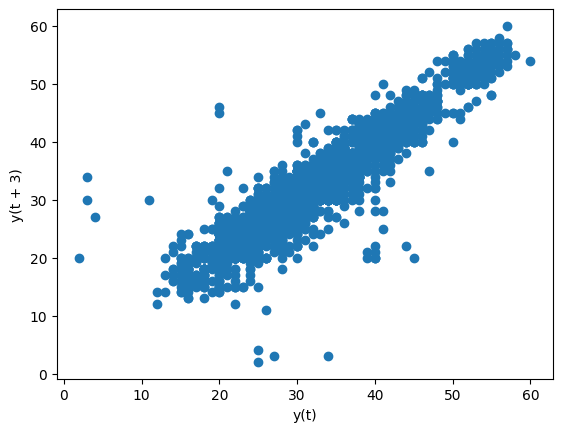

In [ ]:
pd.plotting.lag_plot(df_Ranchi_1['Arrival Quantity'],lag=3)

<Axes: xlabel='y(t)', ylabel='y(t + 13)'>

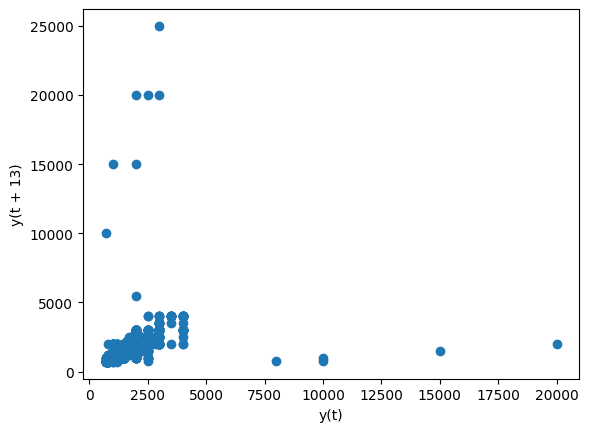

In [ ]:
pd.plotting.lag_plot(df_Ranchi['Retail Prices'],lag=13)

In [ ]:
from statsmodels.tsa.stattools import adfuller


# In[19]:


test_result=adfuller(df_Ranchi_dropped['Arrival Quantity'])


# In[20]:


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:

adfuller_test(df_Ranchi_dropped['Arrival Quantity'])

ADF Test Statistic : -4.753438186528725
p-value : 6.670950505374759e-05
#Lags Used : 3
Number of Observations Used : 2929
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df_Ranchi_dropped['Retail Prices'])

ADF Test Statistic : -3.8862723689611567
p-value : 0.002138230096443192
#Lags Used : 13
Number of Observations Used : 2919
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df_Ranchi['Retail Prices']=df_Ranchi['Retail Prices'].fillna(-1)

In [ ]:
df_Ranchi.isnull().sum()

Arrival Quantity    864
Retail Prices         0
Min Price           864
Max Price           864
Modal Price         864
dtype: int64

In [ ]:
df_Ranchi=df_Ranchi[(df_Ranchi['Retail Prices']<=4000)]

In [ ]:
df_Ranchi['Retail Prices'].iplot()

In [ ]:
df_Ranchi.replace(-1,np.nan,inplace=True)

In [ ]:
df_Ranchi_imp=pd.DataFrame()
df_Ranchi_imp['Retail Prices']=df_Ranchi['Retail Prices'].rolling(window=13,min_periods=6).mean().fillna(method='ffill')
df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=3,min_periods=1).mean().fillna(method='ffill')
df_Ranchi_imp['Retail Prices_lag']=df_Ranchi['Retail Prices'].rolling(window=13,min_periods=6).mean().fillna(method='ffill').shift(1)
# df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=5,min_periods=2).mean().fillna(method='bfill')
df_Ranchi_imp=df_Ranchi_imp.dropna()
#df_Ranchi_imp['2008':'2016']['Retail Prices'].plot()
df_Ranchi_imp[['Retail Prices','Retail Prices_lag']].iplot()
df_Ranchi_imp.isnull().sum()

Retail Prices        0
Arrival Quantity     0
Retail Prices_lag    0
dtype: int64

In [ ]:
df_Ranchi_imp_month=pd.DataFrame()
df_Ranchi_imp_month['Retail Prices_lag']=df_Ranchi_imp['Retail Prices_lag'].resample('M').mean()
df_Ranchi_imp_month['Arrival Quantity']=df_Ranchi_imp['Arrival Quantity'].resample('M').max()
df_Ranchi_imp_month['Arrival Quantity_mean']=df_Ranchi_imp['Arrival Quantity'].resample('M').mean()
df_Ranchi_imp_month=df_Ranchi_imp_month.dropna()
df_Ranchi_imp_month.index = df_Ranchi_imp_month.index + pd.offsets.MonthBegin(0)
df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].tail(6)

Arrival Quantity  Retail Prices_lag
Date                                           
2019-11-01              31.0        2141.019062
2019-12-01              28.0        2787.218964
2020-01-01              34.5        3000.000000
2020-02-01              36.5        2986.191077
2020-03-01              42.0        2330.008418
2020-04-01              42.0        2061.725550

In [ ]:
df_1_new=pd.read_csv('Fert_shimla_dies_price.csv',index_col=[0],parse_dates=True)
df_1_new

N       P       K      S  thousand million barrels     dprice
2010-01-01  23.227  26.276  24.487  1.784                  5.800000  38.550835
2010-04-01  23.227  26.276  24.487  1.784                  5.766667  38.550835
2010-11-01  23.227  25.950  24.237  1.784                  5.733333  38.550835
2011-01-01  23.227  25.624  23.987  1.784                  5.700000  39.767325
2011-04-01  27.153  32.338  26.756  1.677                  5.700000  40.983816
...            ...     ...     ...    ...                       ...        ...
2022-04-01  18.901  15.216  11.124  3.562                  4.700000  89.347496
2022-05-01  18.901  15.216  11.124  3.562                  4.700000  86.043248
2023-01-01  18.901  15.216  11.124  3.562                  4.700000  82.936266
2023-02-01  18.901  15.216  11.124  3.562                  4.700000  85.796662
2023-06-01  18.901  15.216  11.124  3.562                  4.700000  86.191198

[75 rows x 6 columns]

In [ ]:
#df_1_new=pd.read_csv('FERTILIZERS.csv',names=['Date','N','P','K','S'],header=0,index_col=[0],parse_dates=True)
finaldf1=df_Ranchi_imp_month[['Arrival Quantity_mean','Retail Prices_lag']].copy()
finaldf1

Arrival Quantity_mean  Retail Prices_lag
Date                                                
2010-02-01              22.354167        1000.000000
2010-03-01              25.080645        1051.087488
2010-04-01              31.050000         848.809524
2010-05-01              30.790323         800.000000
2010-06-01              29.349462         859.178886
...                           ...                ...
2019-12-01              25.075269        2787.218964
2020-01-01              29.489247        3000.000000
2020-02-01              32.933333        2986.191077
2020-03-01              38.033333        2330.008418
2020-04-01              39.521505        2061.725550

[123 rows x 2 columns]

In [ ]:
finaldf1=df_Ranchi_imp_month[['Arrival Quantity_mean','Retail Prices_lag']].copy()
df_concat_1 = pd.concat([finaldf1, df_1_new], axis=1, join='outer')
df_concat_1.loc[:,['N','P','K','S','thousand million barrels','dprice']]=df_concat_1.loc[:,['N','P','K','S','thousand million barrels','dprice']].interpolate().fillna(method='bfill')
df_concat_1.dropna(subset=['Arrival Quantity_mean','Retail Prices_lag'],inplace=True)
df_concat_1.head()

Arrival Quantity_mean  Retail Prices_lag       N          P  \
2010-02-01              22.354167        1000.000000  23.227  26.276000   
2010-03-01              25.080645        1051.087488  23.227  26.276000   
2010-04-01              31.050000         848.809524  23.227  26.276000   
2010-05-01              30.790323         800.000000  23.227  26.229429   
2010-06-01              29.349462         859.178886  23.227  26.182857   

                    K      S  thousand million barrels     dprice  
2010-02-01  24.487000  1.784                  5.788889  38.550835  
2010-03-01  24.487000  1.784                  5.777778  38.550835  
2010-04-01  24.487000  1.784                  5.766667  38.550835  
2010-05-01  24.451286  1.784                  5.761905  38.550835  
2010-06-01  24.415571  1.784                  5.757143  38.550835

In [ ]:
df_concat_1['NBS rate']=df_concat_1['N']+1*df_concat_1['P']+2*df_concat_1['K']
df_concat_1=df_concat_1.loc[:,['Arrival Quantity_mean','Retail Prices_lag','NBS rate','thousand million barrels','dprice']]
df_concat_1

Arrival Quantity_mean  Retail Prices_lag  NBS rate  \
2010-02-01              22.354167        1000.000000    98.477   
2010-03-01              25.080645        1051.087488    98.477   
2010-04-01              31.050000         848.809524    98.477   
2010-05-01              30.790323         800.000000    98.359   
2010-06-01              29.349462         859.178886    98.241   
...                           ...                ...       ...   
2019-12-01              25.075269        2787.218964    56.365   
2020-01-01              29.489247        3000.000000    56.365   
2020-02-01              32.933333        2986.191077    56.365   
2020-03-01              38.033333        2330.008418    56.365   
2020-04-01              39.521505        2061.725550    56.365   

            thousand million barrels     dprice  
2010-02-01                  5.788889  38.550835  
2010-03-01                  5.777778  38.550835  
2010-04-01                  5.766667  38.550835  
2010-05-01                  5.761905  38.550835  
2010-06-01                  5.757143  38.550835  
...                              ...        ...  
2019-12-01                  4.700000  65.576633  
2020-01-01                  4.700000  66.168439  
2020-02-01                  4.700000  68.042489  
2020-03-01                  4.700000  63.702581  
2020-04-01                  4.700000  65.625949  

[123 rows x 5 columns]

In [ ]:
df_rain=pd.read_csv('Rainfal_shimla.csv',index_col=[0],parse_dates=True)
df_rain_m=df_rain.resample('MS').sum()
df_rain_m=df_rain_m.loc[df_concat_1.index,:]
df_rain_m

Rainfall
2010-02-01      73.3
2010-03-01      25.8
2010-04-01      25.5
2010-05-01      56.6
2010-06-01     122.9
...              ...
2019-12-01      29.9
2020-01-01     127.6
2020-02-01      19.0
2020-03-01     134.5
2020-04-01       4.6

[123 rows x 1 columns]

In [ ]:
df_temp=pd.read_csv('shimla_temp_data.csv',index_col=[0],parse_dates=True)
df_temp=df_temp.loc[df_concat_1.index[:-4],['tasmin','tasmax']]
df_temp


tasmin     tasmax
2010-02-01  -0.850000   9.000000
2010-03-01   5.350000  16.449999
2010-04-01  10.025001  20.225000
2010-05-01  11.325000  21.150000
2010-06-01  12.600000  20.800001
...               ...        ...
2019-08-01  13.875001  19.500000
2019-09-01  12.400000  20.050000
2019-10-01   8.275000  15.900001
2019-11-01   4.800000  11.325000
2019-12-01  -2.400000   7.475000

[119 rows x 2 columns]

In [ ]:
df_concat_1=pd.concat([df_concat_1,df_rain_m,df_temp],axis=1)
df_concat_1

Arrival Quantity_mean  Retail Prices_lag  NBS rate  \
2010-02-01              22.354167        1000.000000    98.477   
2010-03-01              25.080645        1051.087488    98.477   
2010-04-01              31.050000         848.809524    98.477   
2010-05-01              30.790323         800.000000    98.359   
2010-06-01              29.349462         859.178886    98.241   
...                           ...                ...       ...   
2019-12-01              25.075269        2787.218964    56.365   
2020-01-01              29.489247        3000.000000    56.365   
2020-02-01              32.933333        2986.191077    56.365   
2020-03-01              38.033333        2330.008418    56.365   
2020-04-01              39.521505        2061.725550    56.365   

            thousand million barrels     dprice  Rainfall     tasmin  \
2010-02-01                  5.788889  38.550835      73.3  -0.850000   
2010-03-01                  5.777778  38.550835      25.8   5.350000   
2010-04-01                  5.766667  38.550835      25.5  10.025001   
2010-05-01                  5.761905  38.550835      56.6  11.325000   
2010-06-01                  5.757143  38.550835     122.9  12.600000   
...                              ...        ...       ...        ...   
2019-12-01                  4.700000  65.576633      29.9  -2.400000   
2020-01-01                  4.700000  66.168439     127.6        NaN   
2020-02-01                  4.700000  68.042489      19.0        NaN   
2020-03-01                  4.700000  63.702581     134.5        NaN   
2020-04-01                  4.700000  65.625949       4.6        NaN   

               tasmax  
2010-02-01   9.000000  
2010-03-01  16.449999  
2010-04-01  20.225000  
2010-05-01  21.150000  
2010-06-01  20.800001  
...               ...  
2019-12-01   7.475000  
2020-01-01        NaN  
2020-02-01        NaN  
2020-03-01        NaN  
2020-04-01        NaN  

[123 rows x 8 columns]

In [ ]:
df_new=pd.read_csv('gdp and cpi merged.csv',index_col=0,parse_dates=True)
finaldf1=df_concat_1.merge(df_new,on=df_concat_1.index)
finaldf1=finaldf1.iloc[:-4,:]

In [ ]:
finaldf1

key_0  Arrival Quantity_mean  Retail Prices_lag  NBS rate  \
0   2010-02-01              22.354167        1000.000000    98.477   
1   2010-03-01              25.080645        1051.087488    98.477   
2   2010-04-01              31.050000         848.809524    98.477   
3   2010-05-01              30.790323         800.000000    98.359   
4   2010-06-01              29.349462         859.178886    98.241   
..         ...                    ...                ...       ...   
114 2019-08-01              30.026882        2052.052786    56.365   
115 2019-09-01              27.005376        2730.384490    56.365   
116 2019-10-01              25.416667        2489.090909    56.365   
117 2019-11-01              26.053763        2141.019062    56.365   
118 2019-12-01              25.075269        2787.218964    56.365   

     thousand million barrels     dprice  Rainfall     tasmin     tasmax  \
0                    5.788889  38.550835      73.3  -0.850000   9.000000   
1                    5.777778  38.550835      25.8   5.350000  16.449999   
2                    5.766667  38.550835      25.5  10.025001  20.225000   
3                    5.761905  38.550835      56.6  11.325000  21.150000   
4                    5.757143  38.550835     122.9  12.600000  20.800001   
..                        ...        ...       ...        ...        ...   
114                  4.700000  63.505313     246.3  13.875001  19.500000   
115                  4.700000  63.949166      78.7  12.400000  20.050000   
116                  4.700000  64.393020      15.8   8.275000  15.900001   
117                  4.700000  64.984826      34.6   4.800000  11.325000   
118                  4.700000  65.576633      29.9  -2.400000   7.475000   

            CPI        GDP  
0     65.030284   99.41989  
1     65.030284   99.62147  
2     65.030284   99.81792  
3     65.795346  100.00665  
4     66.560408  100.18442  
..          ...        ...  
114  122.409946  100.58100  
115  123.175008  100.43866  
116  124.322601  100.27402  
117  125.470194  100.08812  
118  126.235257   99.88208  

[119 rows x 11 columns]

In [ ]:
finaldf1['ds'] = pd.to_datetime(finaldf1.key_0)
finaldf1.drop('key_0',axis=1,inplace=True)
finaldf1
finaldf1.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf1.tail()

Arrival Quantity_mean            y  NBS rate  thousand million barrels  \
114              30.026882  2052.052786    56.365                       4.7   
115              27.005376  2730.384490    56.365                       4.7   
116              25.416667  2489.090909    56.365                       4.7   
117              26.053763  2141.019062    56.365                       4.7   
118              25.075269  2787.218964    56.365                       4.7   

        dprice  Rainfall     tasmin     tasmax         CPI        GDP  \
114  63.505313     246.3  13.875001  19.500000  122.409946  100.58100   
115  63.949166      78.7  12.400000  20.050000  123.175008  100.43866   
116  64.393020      15.8   8.275000  15.900001  124.322601  100.27402   
117  64.984826      34.6   4.800000  11.325000  125.470194  100.08812   
118  65.576633      29.9  -2.400000   7.475000  126.235257   99.88208   

            ds  
114 2019-08-01  
115 2019-09-01  
116 2019-10-01  
117 2019-11-01  
118 2019-12-01

In [ ]:
df_1_new

N       P       K      S  thousand million barrels     dprice
2010-01-01  23.227  26.276  24.487  1.784                  5.800000  38.550835
2010-04-01  23.227  26.276  24.487  1.784                  5.766667  38.550835
2010-11-01  23.227  25.950  24.237  1.784                  5.733333  38.550835
2011-01-01  23.227  25.624  23.987  1.784                  5.700000  39.767325
2011-04-01  27.153  32.338  26.756  1.677                  5.700000  40.983816
...            ...     ...     ...    ...                       ...        ...
2022-04-01  18.901  15.216  11.124  3.562                  4.700000  89.347496
2022-05-01  18.901  15.216  11.124  3.562                  4.700000  86.043248
2023-01-01  18.901  15.216  11.124  3.562                  4.700000  82.936266
2023-02-01  18.901  15.216  11.124  3.562                  4.700000  85.796662
2023-06-01  18.901  15.216  11.124  3.562                  4.700000  86.191198

[75 rows x 6 columns]

In [ ]:
finaldf=df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].copy()
df_concat = pd.concat([finaldf, df_1_new], axis=1, join='outer')
df_concat.loc[:,['N','P','K','S','thousand million barrels','dprice']]=df_concat.loc[:,['N','P','K','S','thousand million barrels','dprice']].interpolate().fillna(method='bfill')
df_concat.dropna(subset=['Arrival Quantity','Retail Prices_lag'],inplace=True)
df_concat.tail()

Arrival Quantity  Retail Prices_lag       N       P       K  \
2019-12-01              28.0        2787.218964  18.901  15.216  11.124   
2020-01-01              34.5        3000.000000  18.901  15.216  11.124   
2020-02-01              36.5        2986.191077  18.901  15.216  11.124   
2020-03-01              42.0        2330.008418  18.901  15.216  11.124   
2020-04-01              42.0        2061.725550  18.901  15.216  11.124   

                S  thousand million barrels     dprice  
2019-12-01  3.562                       4.7  65.576633  
2020-01-01  3.562                       4.7  66.168439  
2020-02-01  3.562                       4.7  68.042489  
2020-03-01  3.562                       4.7  63.702581  
2020-04-01  3.562                       4.7  65.625949

In [ ]:
df_concat['NBS rate']=df_concat['N']+df_concat['P']+2*df_concat['K']
df_concat=df_concat.loc[:,['Arrival Quantity','Retail Prices_lag','NBS rate','thousand million barrels','dprice']]
df_concat

Arrival Quantity  Retail Prices_lag  NBS rate  \
2010-02-01         25.000000        1000.000000    98.477   
2010-03-01         32.500000        1051.087488    98.477   
2010-04-01         33.500000         848.809524    98.477   
2010-05-01         33.000000         800.000000    98.359   
2010-06-01         34.666667         859.178886    98.241   
...                      ...                ...       ...   
2019-12-01         28.000000        2787.218964    56.365   
2020-01-01         34.500000        3000.000000    56.365   
2020-02-01         36.500000        2986.191077    56.365   
2020-03-01         42.000000        2330.008418    56.365   
2020-04-01         42.000000        2061.725550    56.365   

            thousand million barrels     dprice  
2010-02-01                  5.788889  38.550835  
2010-03-01                  5.777778  38.550835  
2010-04-01                  5.766667  38.550835  
2010-05-01                  5.761905  38.550835  
2010-06-01                  5.757143  38.550835  
...                              ...        ...  
2019-12-01                  4.700000  65.576633  
2020-01-01                  4.700000  66.168439  
2020-02-01                  4.700000  68.042489  
2020-03-01                  4.700000  63.702581  
2020-04-01                  4.700000  65.625949  

[123 rows x 5 columns]

In [ ]:
df_concat=pd.concat([df_concat,df_rain_m,df_temp],axis=1)
df_concat

Arrival Quantity  Retail Prices_lag  NBS rate  \
2010-02-01         25.000000        1000.000000    98.477   
2010-03-01         32.500000        1051.087488    98.477   
2010-04-01         33.500000         848.809524    98.477   
2010-05-01         33.000000         800.000000    98.359   
2010-06-01         34.666667         859.178886    98.241   
...                      ...                ...       ...   
2019-12-01         28.000000        2787.218964    56.365   
2020-01-01         34.500000        3000.000000    56.365   
2020-02-01         36.500000        2986.191077    56.365   
2020-03-01         42.000000        2330.008418    56.365   
2020-04-01         42.000000        2061.725550    56.365   

            thousand million barrels     dprice  Rainfall     tasmin  \
2010-02-01                  5.788889  38.550835      73.3  -0.850000   
2010-03-01                  5.777778  38.550835      25.8   5.350000   
2010-04-01                  5.766667  38.550835      25.5  10.025001   
2010-05-01                  5.761905  38.550835      56.6  11.325000   
2010-06-01                  5.757143  38.550835     122.9  12.600000   
...                              ...        ...       ...        ...   
2019-12-01                  4.700000  65.576633      29.9  -2.400000   
2020-01-01                  4.700000  66.168439     127.6        NaN   
2020-02-01                  4.700000  68.042489      19.0        NaN   
2020-03-01                  4.700000  63.702581     134.5        NaN   
2020-04-01                  4.700000  65.625949       4.6        NaN   

               tasmax  
2010-02-01   9.000000  
2010-03-01  16.449999  
2010-04-01  20.225000  
2010-05-01  21.150000  
2010-06-01  20.800001  
...               ...  
2019-12-01   7.475000  
2020-01-01        NaN  
2020-02-01        NaN  
2020-03-01        NaN  
2020-04-01        NaN  

[123 rows x 8 columns]

In [ ]:
df_new=pd.read_csv('gdp and cpi merged.csv',index_col=0,parse_dates=True)
finaldf=df_concat.merge(df_new,on=df_concat.index)
finaldf=finaldf.iloc[:-4,:]
finaldf

key_0  Arrival Quantity  Retail Prices_lag  NBS rate  \
0   2010-02-01         25.000000        1000.000000    98.477   
1   2010-03-01         32.500000        1051.087488    98.477   
2   2010-04-01         33.500000         848.809524    98.477   
3   2010-05-01         33.000000         800.000000    98.359   
4   2010-06-01         34.666667         859.178886    98.241   
..         ...               ...                ...       ...   
114 2019-08-01         35.000000        2052.052786    56.365   
115 2019-09-01         31.000000        2730.384490    56.365   
116 2019-10-01         30.000000        2489.090909    56.365   
117 2019-11-01         31.000000        2141.019062    56.365   
118 2019-12-01         28.000000        2787.218964    56.365   

     thousand million barrels     dprice  Rainfall     tasmin     tasmax  \
0                    5.788889  38.550835      73.3  -0.850000   9.000000   
1                    5.777778  38.550835      25.8   5.350000  16.449999   
2                    5.766667  38.550835      25.5  10.025001  20.225000   
3                    5.761905  38.550835      56.6  11.325000  21.150000   
4                    5.757143  38.550835     122.9  12.600000  20.800001   
..                        ...        ...       ...        ...        ...   
114                  4.700000  63.505313     246.3  13.875001  19.500000   
115                  4.700000  63.949166      78.7  12.400000  20.050000   
116                  4.700000  64.393020      15.8   8.275000  15.900001   
117                  4.700000  64.984826      34.6   4.800000  11.325000   
118                  4.700000  65.576633      29.9  -2.400000   7.475000   

            CPI        GDP  
0     65.030284   99.41989  
1     65.030284   99.62147  
2     65.030284   99.81792  
3     65.795346  100.00665  
4     66.560408  100.18442  
..          ...        ...  
114  122.409946  100.58100  
115  123.175008  100.43866  
116  124.322601  100.27402  
117  125.470194  100.08812  
118  126.235257   99.88208  

[119 rows x 11 columns]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

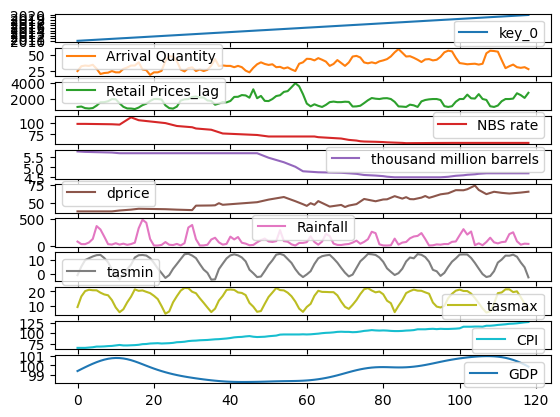

In [ ]:
finaldf.plot(subplots=True)

In [ ]:
finaldf['ds'] = finaldf['key_0']
finaldf.drop('key_0',axis=1,inplace=True)
finaldf
finaldf.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf.tail()

Arrival Quantity            y  NBS rate  thousand million barrels  \
114              35.0  2052.052786    56.365                       4.7   
115              31.0  2730.384490    56.365                       4.7   
116              30.0  2489.090909    56.365                       4.7   
117              31.0  2141.019062    56.365                       4.7   
118              28.0  2787.218964    56.365                       4.7   

        dprice  Rainfall     tasmin     tasmax         CPI        GDP  \
114  63.505313     246.3  13.875001  19.500000  122.409946  100.58100   
115  63.949166      78.7  12.400000  20.050000  123.175008  100.43866   
116  64.393020      15.8   8.275000  15.900001  124.322601  100.27402   
117  64.984826      34.6   4.800000  11.325000  125.470194  100.08812   
118  65.576633      29.9  -2.400000   7.475000  126.235257   99.88208   

            ds  
114 2019-08-01  
115 2019-09-01  
116 2019-10-01  
117 2019-11-01  
118 2019-12-01

In [ ]:
finaldf.isnull().sum()

Arrival Quantity            0
y                           0
NBS rate                    0
thousand million barrels    0
dprice                      0
Rainfall                    0
tasmin                      0
tasmax                      0
CPI                         0
GDP                         0
ds                          0
dtype: int64

In [ ]:
finaldf1.corr()

<ipython-input-62-29b5b127a9ac>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity_mean         y  NBS rate  \
Arrival Quantity_mean                  1.000000 -0.410247 -0.612669   
y                                     -0.410247  1.000000 -0.251050   
NBS rate                              -0.612669 -0.251050  1.000000   
thousand million barrels              -0.677749 -0.047240  0.891991   
dprice                                 0.509673  0.296581 -0.862606   
Rainfall                              -0.137224 -0.066529  0.092883   
tasmin                                -0.207906  0.033225 -0.026545   
tasmax                                -0.174339 -0.025556 -0.011900   
CPI                                    0.549650  0.269367 -0.951230   
GDP                                    0.238027 -0.284754 -0.141062   

                          thousand million barrels    dprice  Rainfall  \
Arrival Quantity_mean                    -0.677749  0.509673 -0.137224   
y                                        -0.047240  0.296581 -0.066529   
NBS rate                                  0.891991 -0.862606  0.092883   
thousand million barrels                  1.000000 -0.747490  0.058452   
dprice                                   -0.747490  1.000000 -0.030213   
Rainfall                                  0.058452 -0.030213  1.000000   
tasmin                                   -0.035172  0.056166  0.513022   
tasmax                                   -0.023965  0.029209  0.405746   
CPI                                      -0.882403  0.906624 -0.058224   
GDP                                      -0.356326  0.342753  0.099369   

                            tasmin    tasmax       CPI       GDP  
Arrival Quantity_mean    -0.207906 -0.174339  0.549650  0.238027  
y                         0.033225 -0.025556  0.269367 -0.284754  
NBS rate                 -0.026545 -0.011900 -0.951230 -0.141062  
thousand million barrels -0.035172 -0.023965 -0.882403 -0.356326  
dprice                    0.056166  0.029209  0.906624  0.342753  
Rainfall                  0.513022  0.405746 -0.058224  0.099369  
tasmin                    1.000000  0.972025  0.040532  0.045073  
tasmax                    0.972025  1.000000  0.011009  0.034579  
CPI                       0.040532  0.011009  1.000000  0.254317  
GDP                       0.045073  0.034579  0.254317  1.000000

In [ ]:
finaldf.corr()

<ipython-input-63-fbcde4b1202f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity         y  NBS rate  \
Arrival Quantity                  1.000000 -0.416450 -0.587832   
y                                -0.416450  1.000000 -0.251050   
NBS rate                         -0.587832 -0.251050  1.000000   
thousand million barrels         -0.652489 -0.047240  0.891991   
dprice                            0.470081  0.296581 -0.862606   
Rainfall                         -0.108518 -0.066529  0.092883   
tasmin                           -0.209815  0.033225 -0.026545   
tasmax                           -0.181172 -0.025556 -0.011900   
CPI                               0.525576  0.269367 -0.951230   
GDP                               0.201741 -0.284754 -0.141062   

                          thousand million barrels    dprice  Rainfall  \
Arrival Quantity                         -0.652489  0.470081 -0.108518   
y                                        -0.047240  0.296581 -0.066529   
NBS rate                                  0.891991 -0.862606  0.092883   
thousand million barrels                  1.000000 -0.747490  0.058452   
dprice                                   -0.747490  1.000000 -0.030213   
Rainfall                                  0.058452 -0.030213  1.000000   
tasmin                                   -0.035172  0.056166  0.513022   
tasmax                                   -0.023965  0.029209  0.405746   
CPI                                      -0.882403  0.906624 -0.058224   
GDP                                      -0.356326  0.342753  0.099369   

                            tasmin    tasmax       CPI       GDP  
Arrival Quantity         -0.209815 -0.181172  0.525576  0.201741  
y                         0.033225 -0.025556  0.269367 -0.284754  
NBS rate                 -0.026545 -0.011900 -0.951230 -0.141062  
thousand million barrels -0.035172 -0.023965 -0.882403 -0.356326  
dprice                    0.056166  0.029209  0.906624  0.342753  
Rainfall                  0.513022  0.405746 -0.058224  0.099369  
tasmin                    1.000000  0.972025  0.040532  0.045073  
tasmax                    0.972025  1.000000  0.011009  0.034579  
CPI                       0.040532  0.011009  1.000000  0.254317  
GDP                       0.045073  0.034579  0.254317  1.000000

In [ ]:
#finaldf=finaldf1

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

#from sklearn.linear_model import LinearRegression

import plotly.graph_objs as go
from plotly.subplots import make_subplots


import itertools

In [ ]:
# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)

prophetColumns =['Arrival Quantity','CPI','GDP','NBS rate','thousand million barrels']
# model

model = Prophet()

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkuj6mo8/tlem33ns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkuj6mo8/ngw504nu.json
DEBUG:cmdstanpy:idx 0


95
(95, 11)
(24, 11)


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97397', 'data', 'file=/tmp/tmpvkuj6mo8/tlem33ns.json', 'init=/tmp/tmpvkuj6mo8/ngw504nu.json', 'output', 'file=/tmp/tmpvkuj6mo8/prophet_modelhl_uh_fz/prophet_model-20230715083338.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:33:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:33:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 335.679
MAPE: 0.19906573683268844


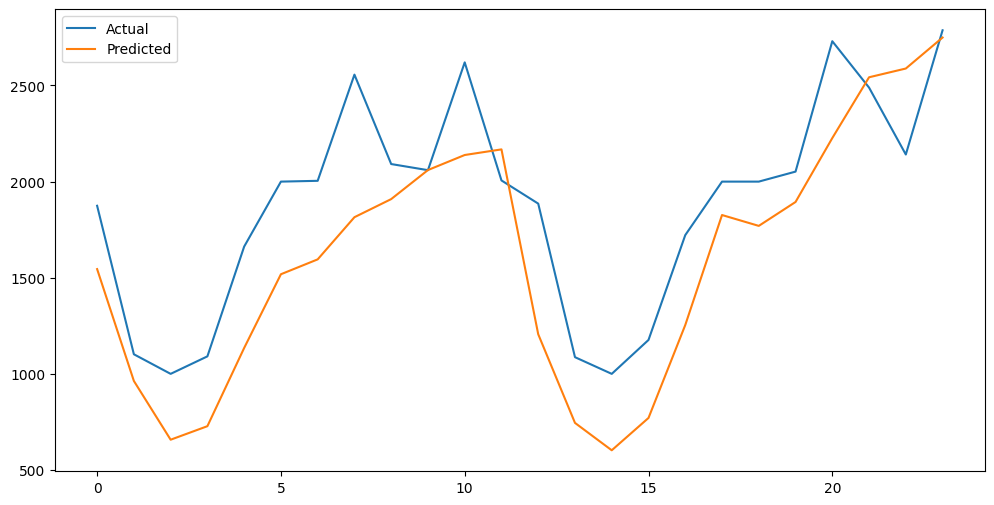

In [ ]:
y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(12, 6))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkuj6mo8/9ppr_6px.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkuj6mo8/96i1rz33.json
DEBUG:cmdstanpy:idx 0


95
(95, 11)
(24, 11)


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38213', 'data', 'file=/tmp/tmpvkuj6mo8/9ppr_6px.json', 'init=/tmp/tmpvkuj6mo8/96i1rz33.json', 'output', 'file=/tmp/tmpvkuj6mo8/prophet_modelqhprkt3p/prophet_model-20230715083340.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:33:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 382.410
MAPE: 0.1825805286262121


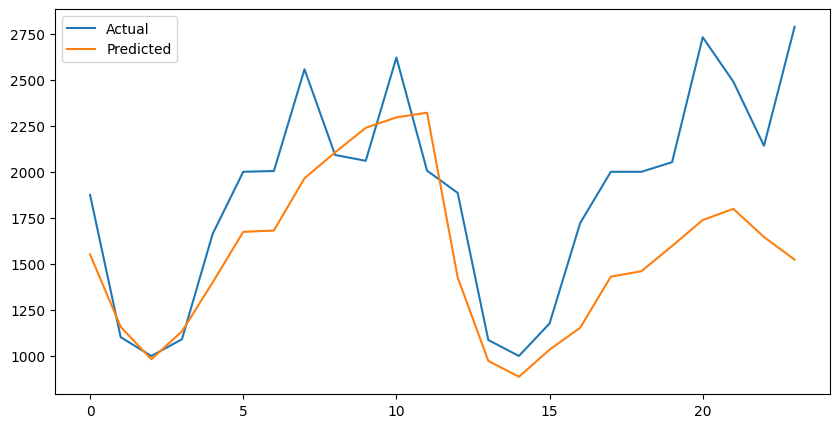

In [ ]:
#Trial 2

# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)
prophetColumns =['Arrival Quantity','CPI','GDP','NBS rate']
# model

#seasonality_mode = 'multiplicative'

#modelWeekly = Prophet(changepoint_range=0.90,changepoint_prior_scale = 0.5)

model = Prophet(changepoint_range=0.95,changepoint_prior_scale = 1,)#seasonality_prior_scale=20)

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(10, 5))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# with extreme weather and 80% train data, seasonality mode mulitplicative
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Arrival Quantity          119 non-null    float64       
 1   y                         119 non-null    float64       
 2   NBS rate                  119 non-null    float64       
 3   thousand million barrels  119 non-null    float64       
 4   dprice                    119 non-null    float64       
 5   Rainfall                  119 non-null    float64       
 6   tasmin                    119 non-null    float64       
 7   tasmax                    119 non-null    float64       
 8   CPI                       119 non-null    float64       
 9   GDP                       119 non-null    float64       
 10  ds                        119 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 11.2 KB


In [ ]:
x=finaldf1.shape[0]
a=int(x*0.95)
b=int(x*0.05)
b=-b
b

-5

In [ ]:
def model_prophet(Prophetdf,n_obs= a+1):

    Prophetdf_train=Prophetdf[0:n_obs]
    Prophetdf_test =Prophetdf[n_obs:]
    multi_model = Prophet(interval_width = 0.95)
    Prophet_cols = Prophetdf.columns.tolist()
    Prophet_cols.remove('ds')
    Prophet_cols.remove('y')
    print(Prophetdf_train.columns)
    #print(Prophetdf_test[['ds','y']])

    # adding all columns in add regressor
    for col in Prophet_cols:
        multi_model.add_regressor(col)


    multi_model.fit(Prophetdf_train)
    print('Prophetdf_test.shape[0]')
    print(Prophetdf_test.shape[0])
    # make furture frame
    future = multi_model.make_future_dataframe(periods = Prophetdf_test.shape[0],freq='MS', include_history=True)
    for col in Prophet_cols:
        future[col] =Prophetdf[col]
    print(Prophetdf_test[['ds','y']])
    print('future')
    print(future)

    # predict future
    forecastProphet =  multi_model.predict(future)
    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

    print(forecastProphet[['ds','yhat', 'yhat_lower','yhat_upper']].tail())

    fig1 = multi_model.plot(forecastProphet)

    Prophetdf.plot(x = 'ds', y = 'y')

    multi_model.plot_components(forecastProphet);


    #print(Prophetdf_test[['ds','y']])
    print(forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][b:])

    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][b:], on='ds')
    #print(combined_df.head())


    #Check MAE value
    MAE = mean_absolute_error(combined_df['y'], combined_df['yhat'])
    print('MAE')
    print(MAE)

#Check MAPE value
    MAPE = mean_absolute_percentage_error(combined_df['y'], combined_df['yhat'])
    print('MAPE')
    print(MAPE)

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()

    sns.lineplot(data = Prophetdf , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet, x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)

    plt.legend(["Original","forecast"])


    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()
    sns.lineplot(data = Prophetdf[b:] , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet[b:], x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)
    plt.legend(["Original","forecast"])




    return MAE

In [ ]:
finaldf.head()

Arrival Quantity            y  NBS rate  thousand million barrels  \
0         25.000000  1000.000000    98.477                  5.788889   
1         32.500000  1051.087488    98.477                  5.777778   
2         33.500000   848.809524    98.477                  5.766667   
3         33.000000   800.000000    98.359                  5.761905   
4         34.666667   859.178886    98.241                  5.757143   

      dprice  Rainfall     tasmin     tasmax        CPI        GDP         ds  
0  38.550835      73.3  -0.850000   9.000000  65.030284   99.41989 2010-02-01  
1  38.550835      25.8   5.350000  16.449999  65.030284   99.62147 2010-03-01  
2  38.550835      25.5  10.025001  20.225000  65.030284   99.81792 2010-04-01  
3  38.550835      56.6  11.325000  21.150000  65.795346  100.00665 2010-05-01  
4  38.550835     122.9  12.600000  20.800001  66.560408  100.18442 2010-06-01

In [ ]:
finaldf1.iplot()

In [ ]:
#HERE we can see that MAE for arrival quantity mean(589.63) resampling is significantly less than that calculated using max resampling(608.94)

In [ ]:
# finaldf.drop(['thousand million barrels','CPI'],axis=1,inplace=True)
finaldf.columns

Index(['Arrival Quantity', 'y', 'NBS rate', 'thousand million barrels',
       'dprice', 'Rainfall', 'tasmin', 'tasmax', 'CPI', 'GDP', 'ds'],
      dtype='object')

In [ ]:
# finaldf1.drop(['thousand million barrels','CPI'],axis=1,inplace=True)
finaldf1.columns

Index(['Arrival Quantity_mean', 'y', 'NBS rate', 'thousand million barrels',
       'dprice', 'Rainfall', 'tasmin', 'tasmax', 'CPI', 'GDP', 'ds'],
      dtype='object')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkuj6mo8/z4wm961k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkuj6mo8/30gmzksb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96771', 'data', 'file=/tmp/tmpvkuj6mo8/z4wm961k.json', 'init=/tmp/tmpvkuj6mo8/30gmzksb.json', 'output', 'file=/tmp/tmpvkuj6mo8/prophet_modele_tj9cky/prophet_model-20230715083344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:33:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:33:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity', 'y', 'NBS rate', 'thousand million barrels',
       'dprice', 'Rainfall', 'tasmin', 'tasmax', 'CPI', 'GDP', 'ds'],
      dtype='object')
Prophetdf_test.shape[0]
5
            ds            y
114 2019-08-01  2052.052786
115 2019-09-01  2730.384490
116 2019-10-01  2489.090909
117 2019-11-01  2141.019062
118 2019-12-01  2787.218964
future
            ds  Arrival Quantity  NBS rate  thousand million barrels  \
0   2010-02-01         25.000000    98.477                  5.788889   
1   2010-03-01         32.500000    98.477                  5.777778   
2   2010-04-01         33.500000    98.477                  5.766667   
3   2010-05-01         33.000000    98.359                  5.761905   
4   2010-06-01         34.666667    98.241                  5.757143   
..         ...               ...       ...                       ...   
114 2019-08-01         35.000000    56.365                  4.700000   
115 2019-09-01         31.000000    56.365                 

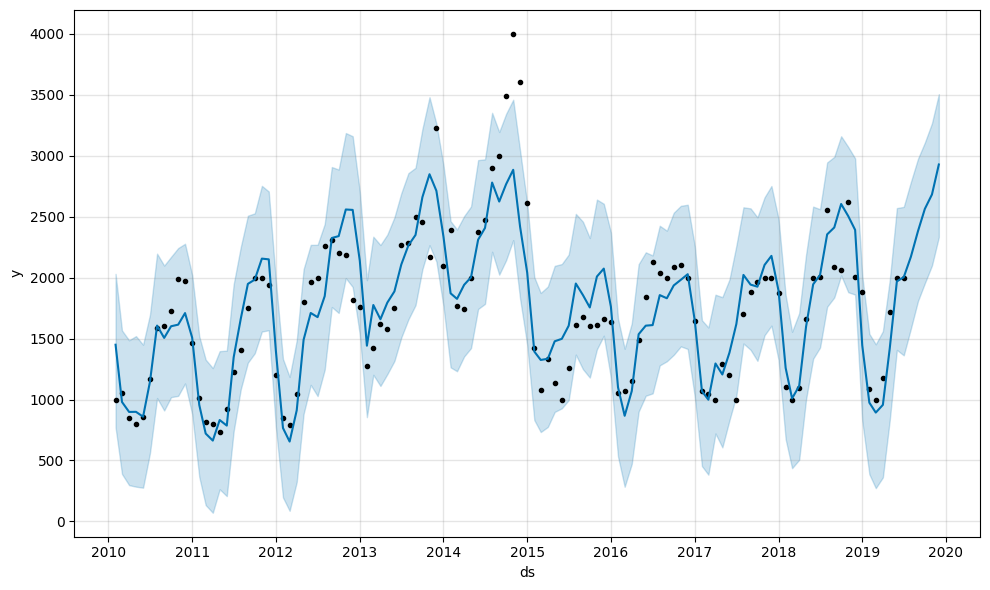

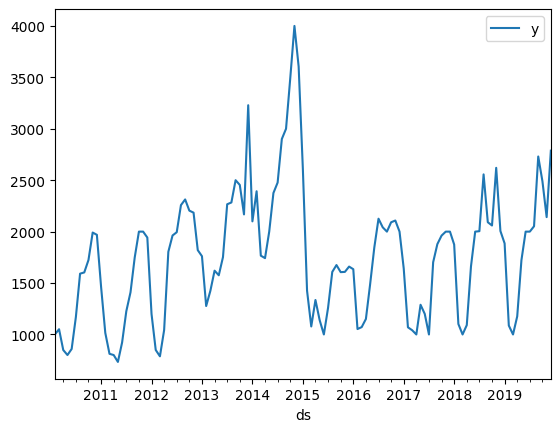

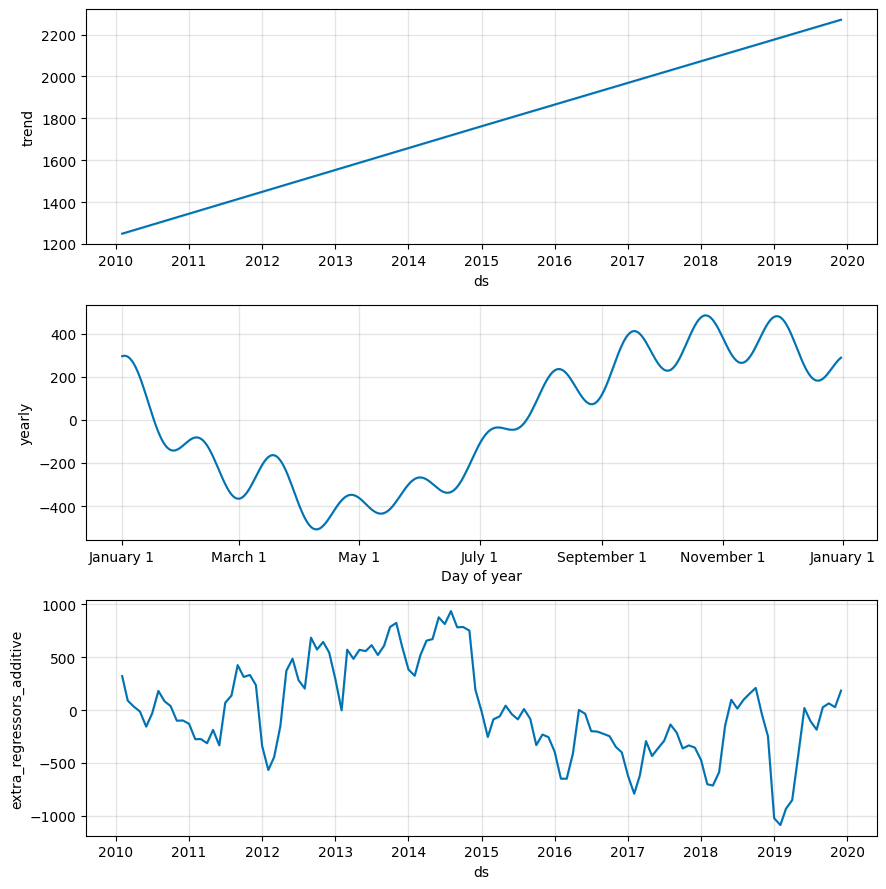

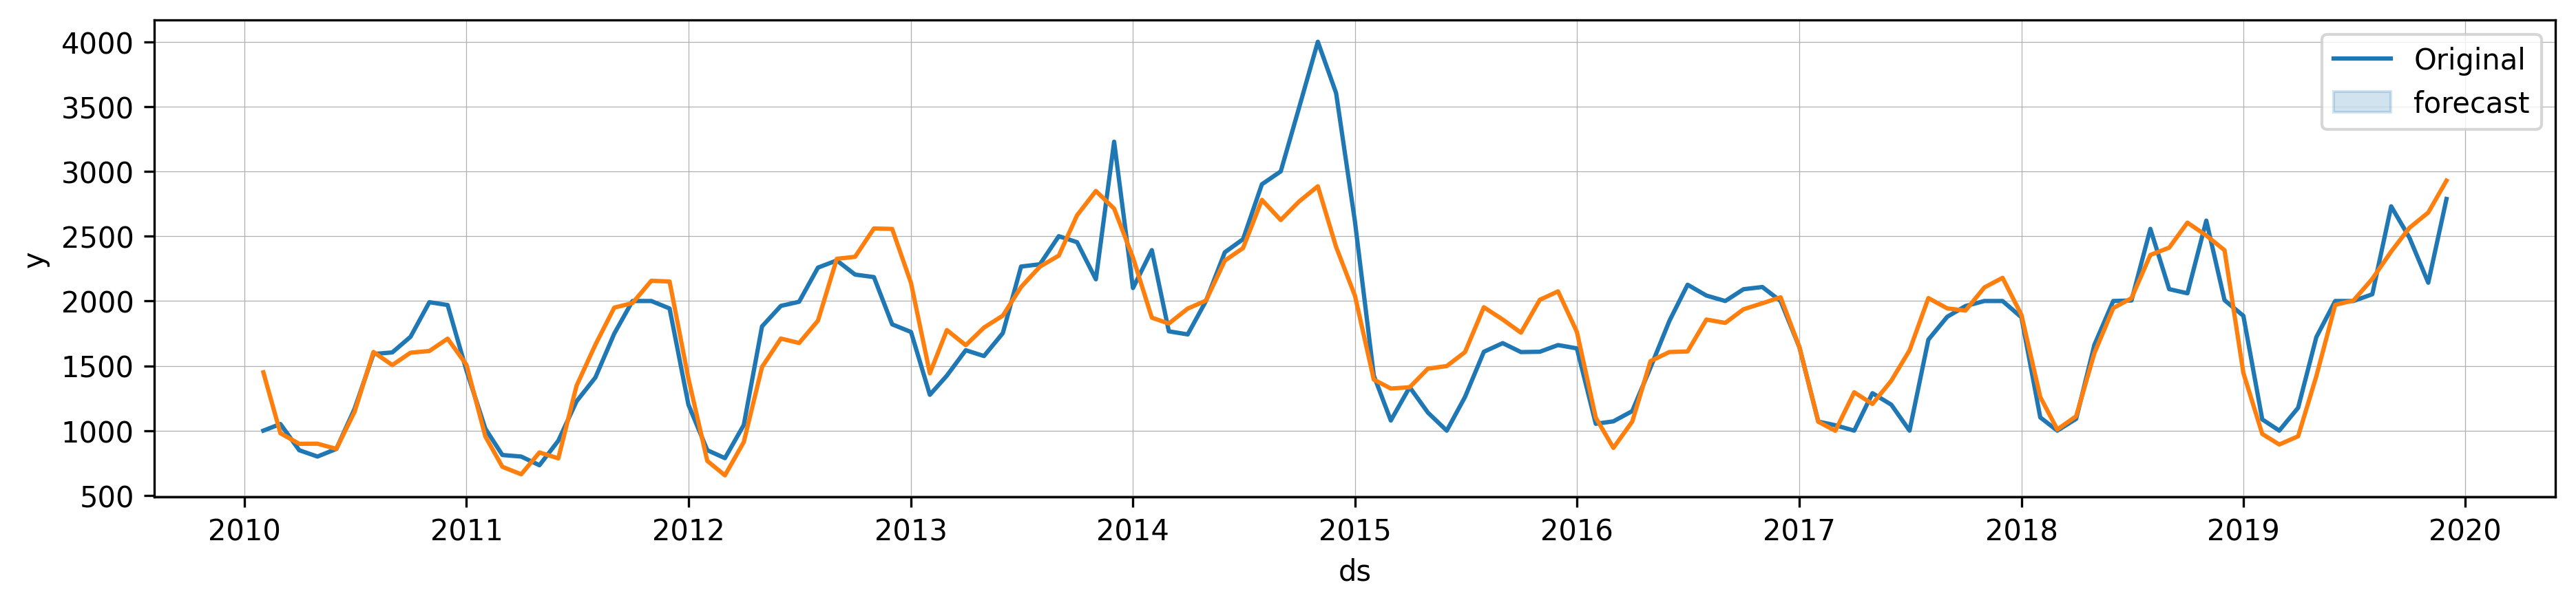

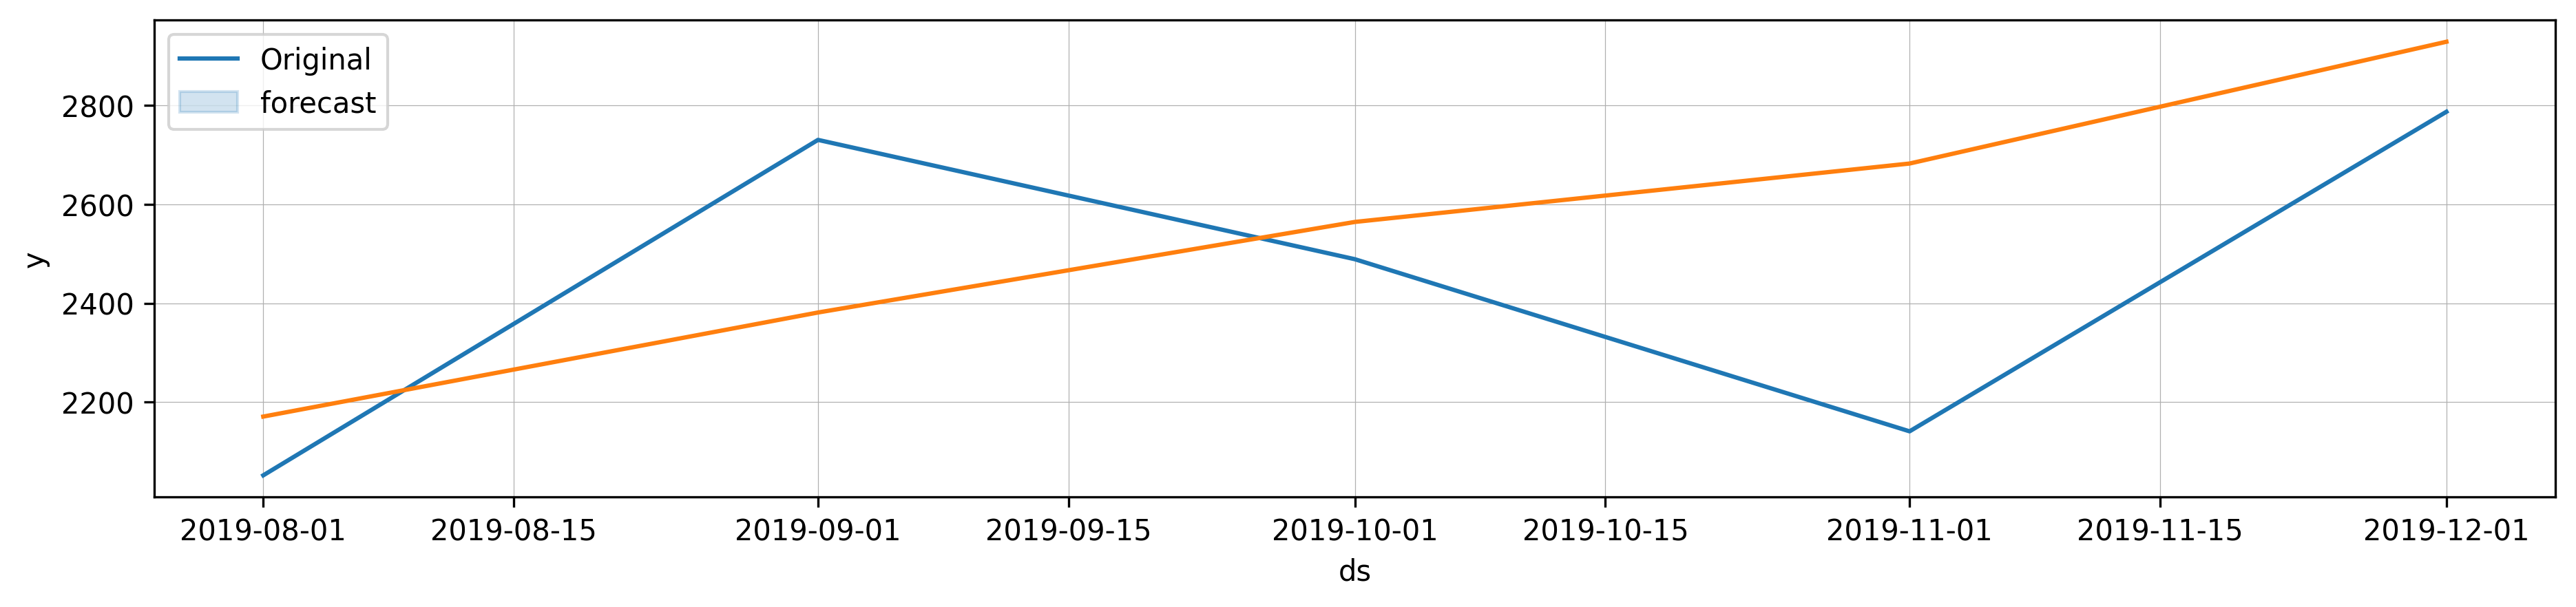

In [ ]:
MAE_Prophet = model_prophet(finaldf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkuj6mo8/tx2_dal3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkuj6mo8/z0icxykc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59631', 'data', 'file=/tmp/tmpvkuj6mo8/tx2_dal3.json', 'init=/tmp/tmpvkuj6mo8/z0icxykc.json', 'output', 'file=/tmp/tmpvkuj6mo8/prophet_model3qdf7j3l/prophet_model-20230715083354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:33:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:33:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity_mean', 'y', 'NBS rate', 'thousand million barrels',
       'dprice', 'Rainfall', 'tasmin', 'tasmax', 'CPI', 'GDP', 'ds'],
      dtype='object')
Prophetdf_test.shape[0]
5
            ds            y
114 2019-08-01  2052.052786
115 2019-09-01  2730.384490
116 2019-10-01  2489.090909
117 2019-11-01  2141.019062
118 2019-12-01  2787.218964
future
            ds  Arrival Quantity_mean  NBS rate  thousand million barrels  \
0   2010-02-01              22.354167    98.477                  5.788889   
1   2010-03-01              25.080645    98.477                  5.777778   
2   2010-04-01              31.050000    98.477                  5.766667   
3   2010-05-01              30.790323    98.359                  5.761905   
4   2010-06-01              29.349462    98.241                  5.757143   
..         ...                    ...       ...                       ...   
114 2019-08-01              30.026882    56.365                  4.700000   
115 2019-09-01

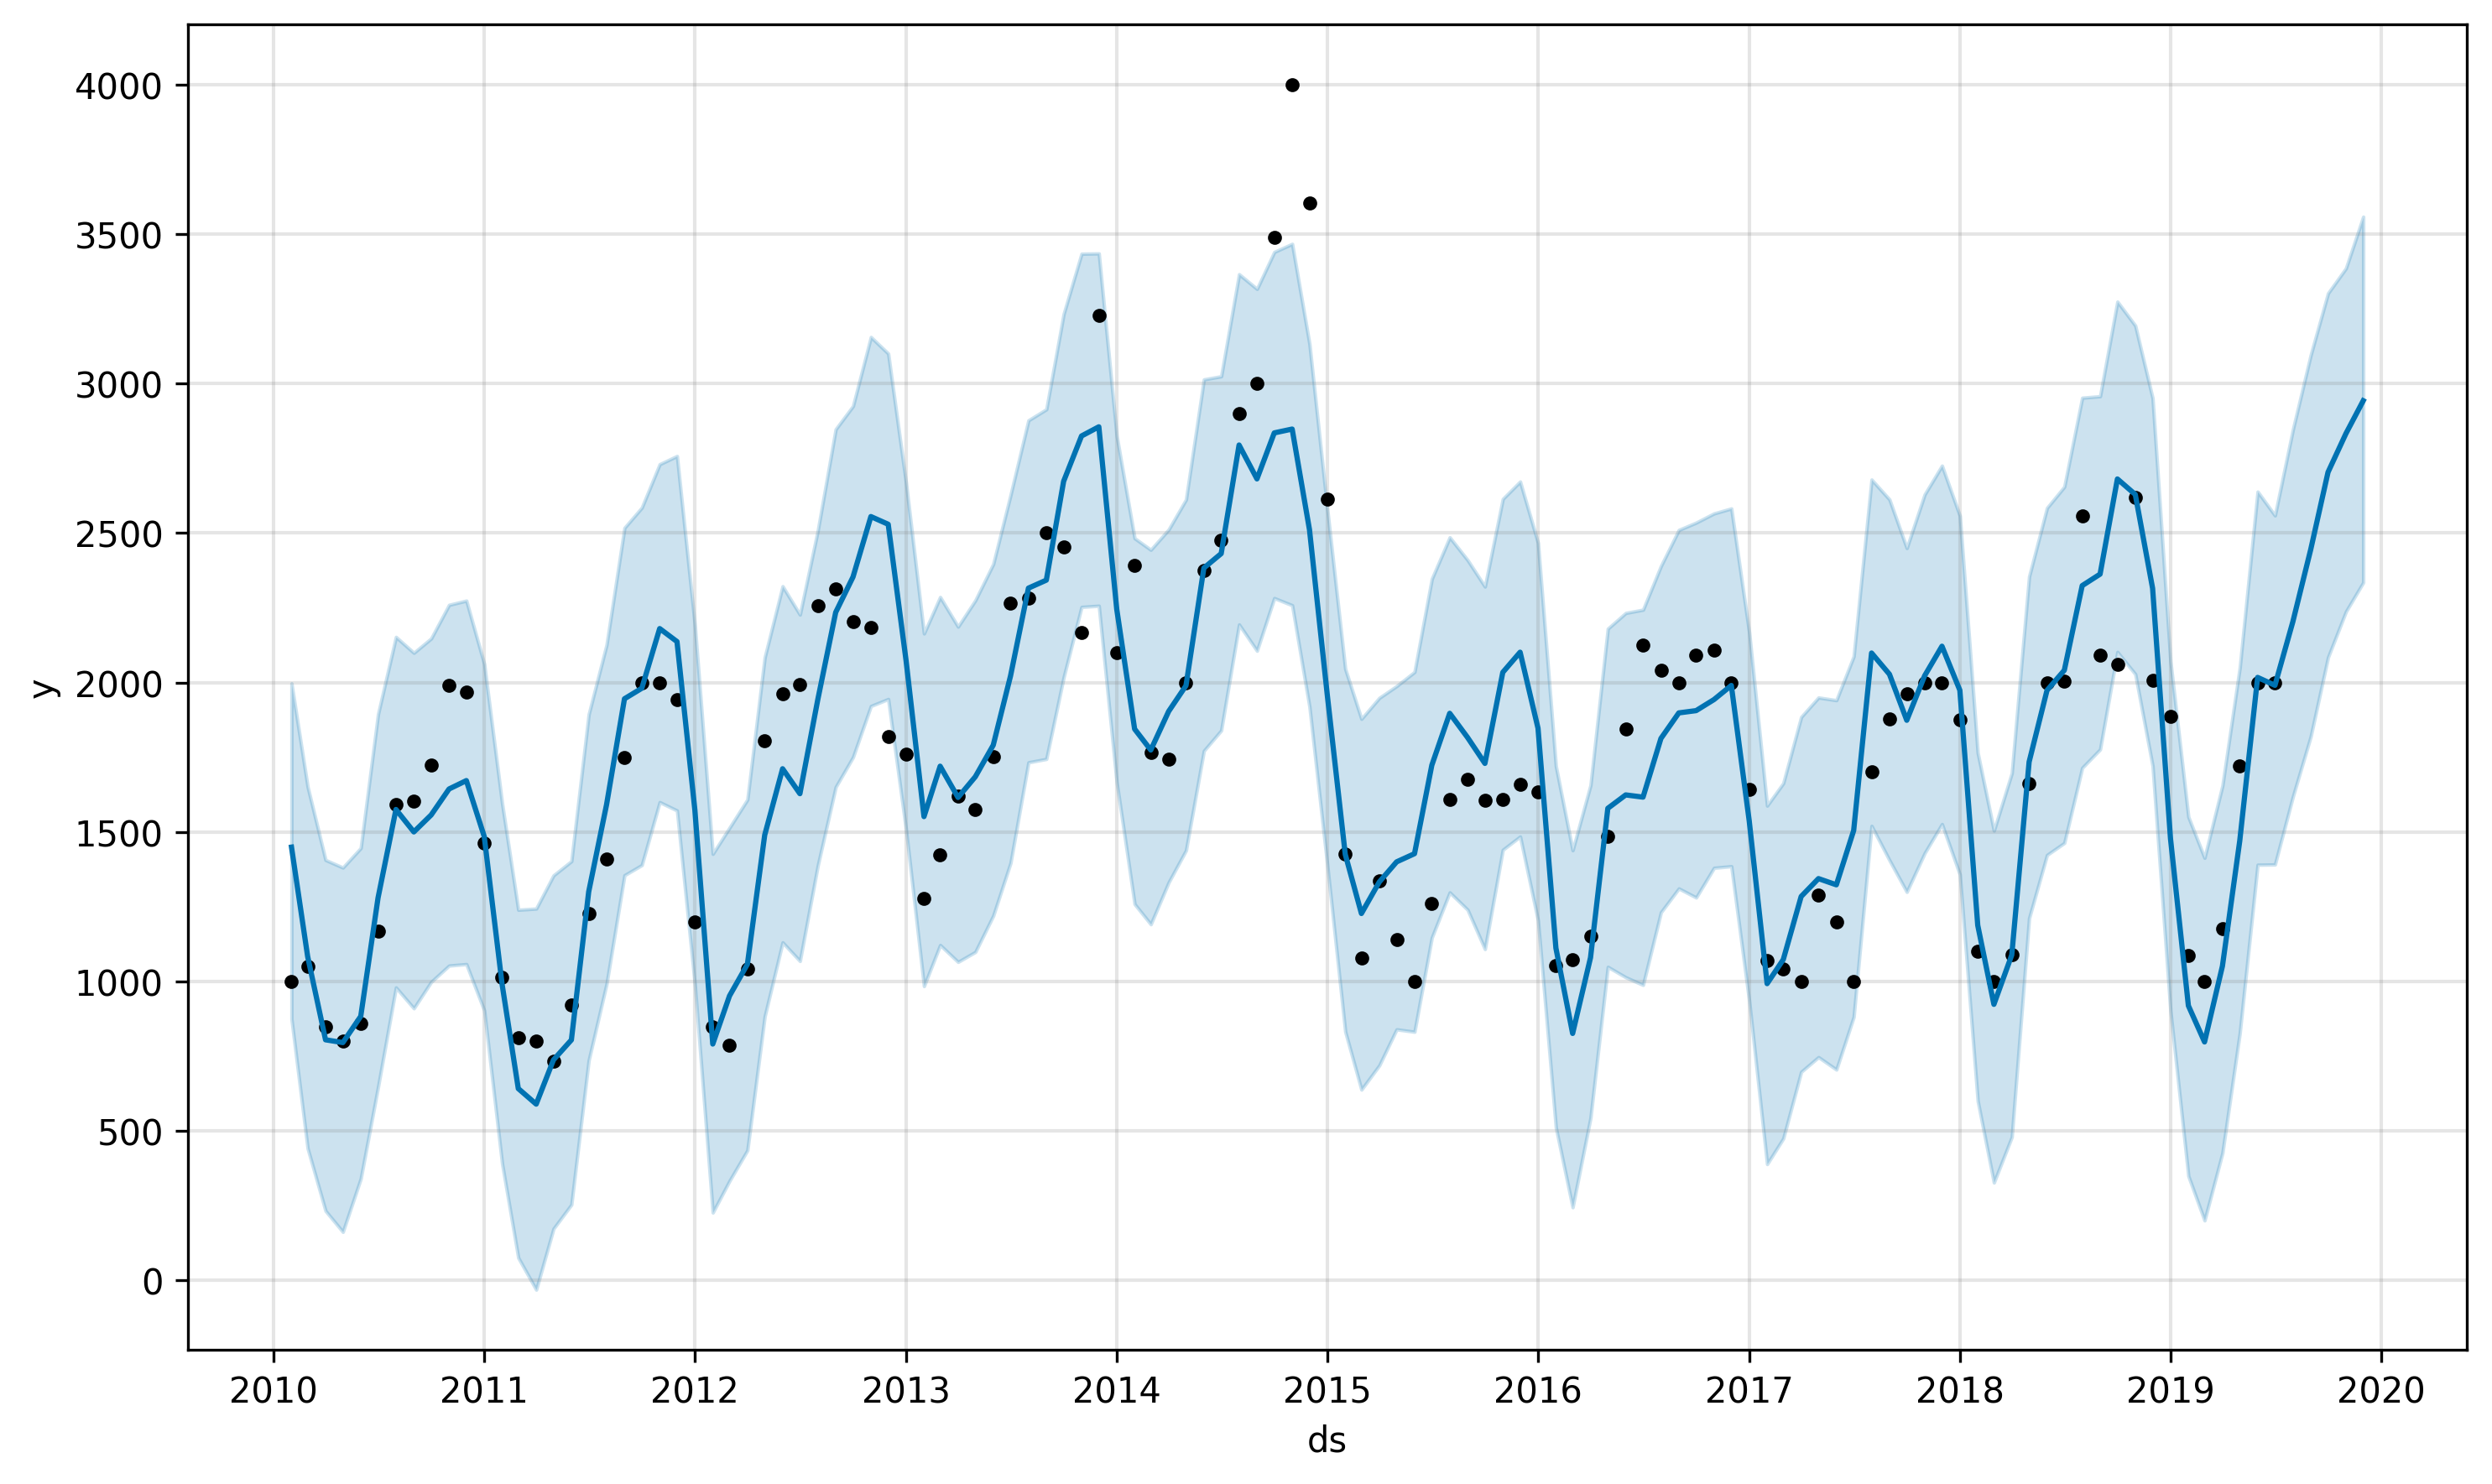

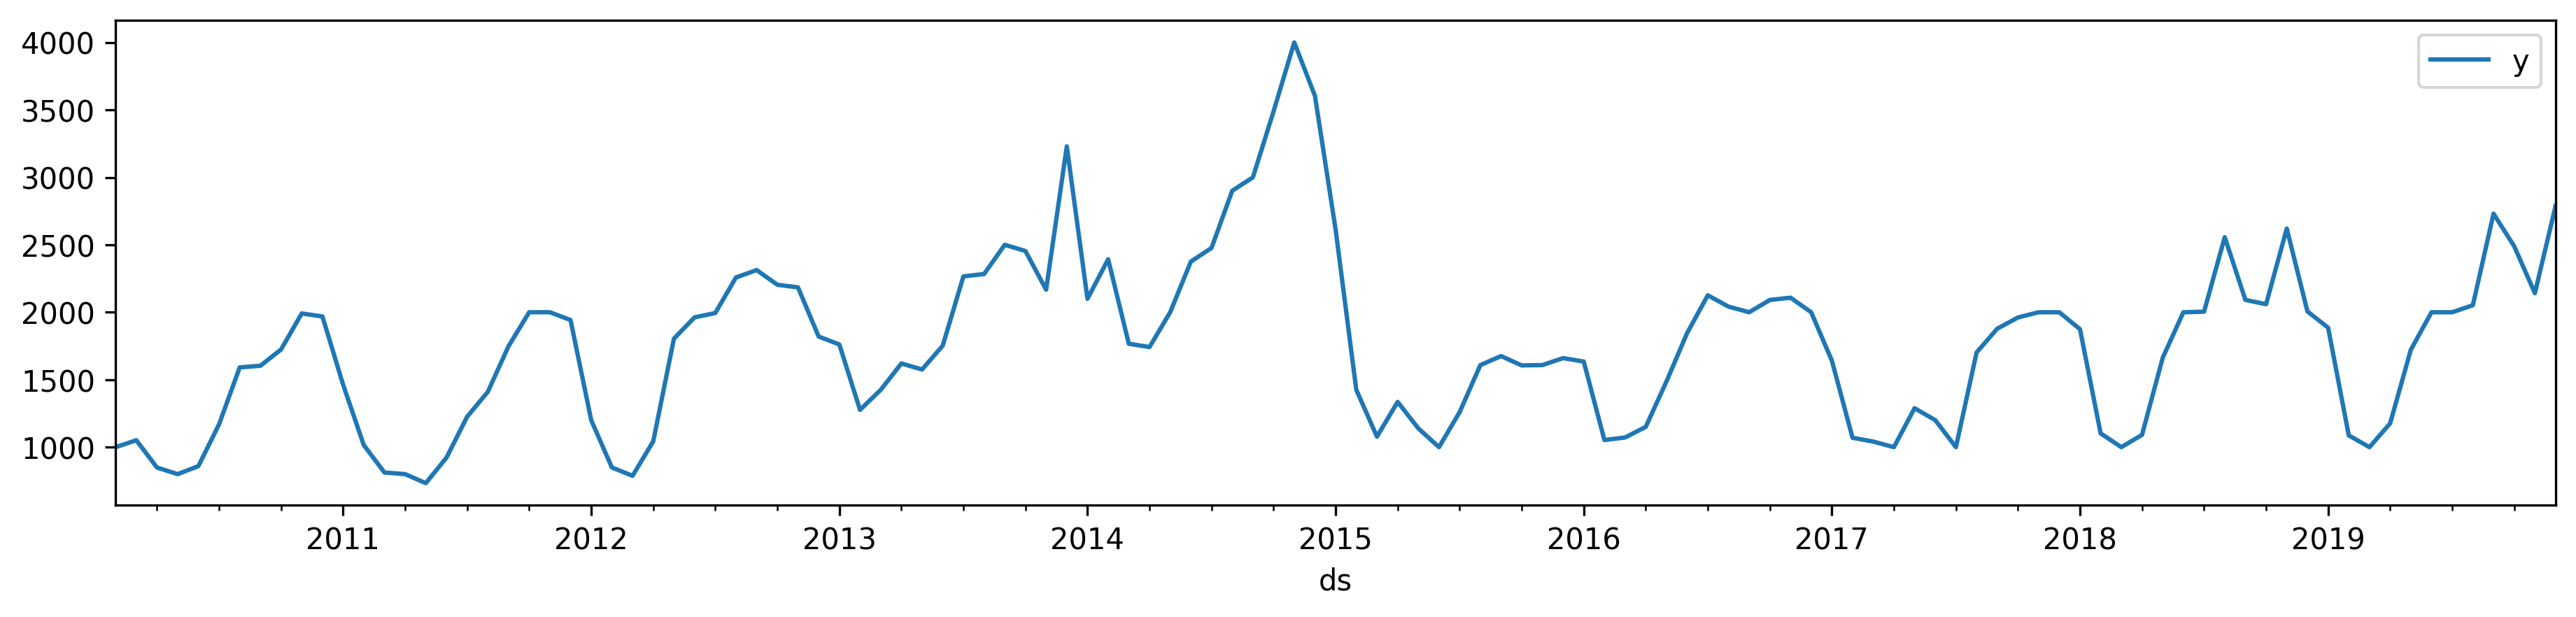

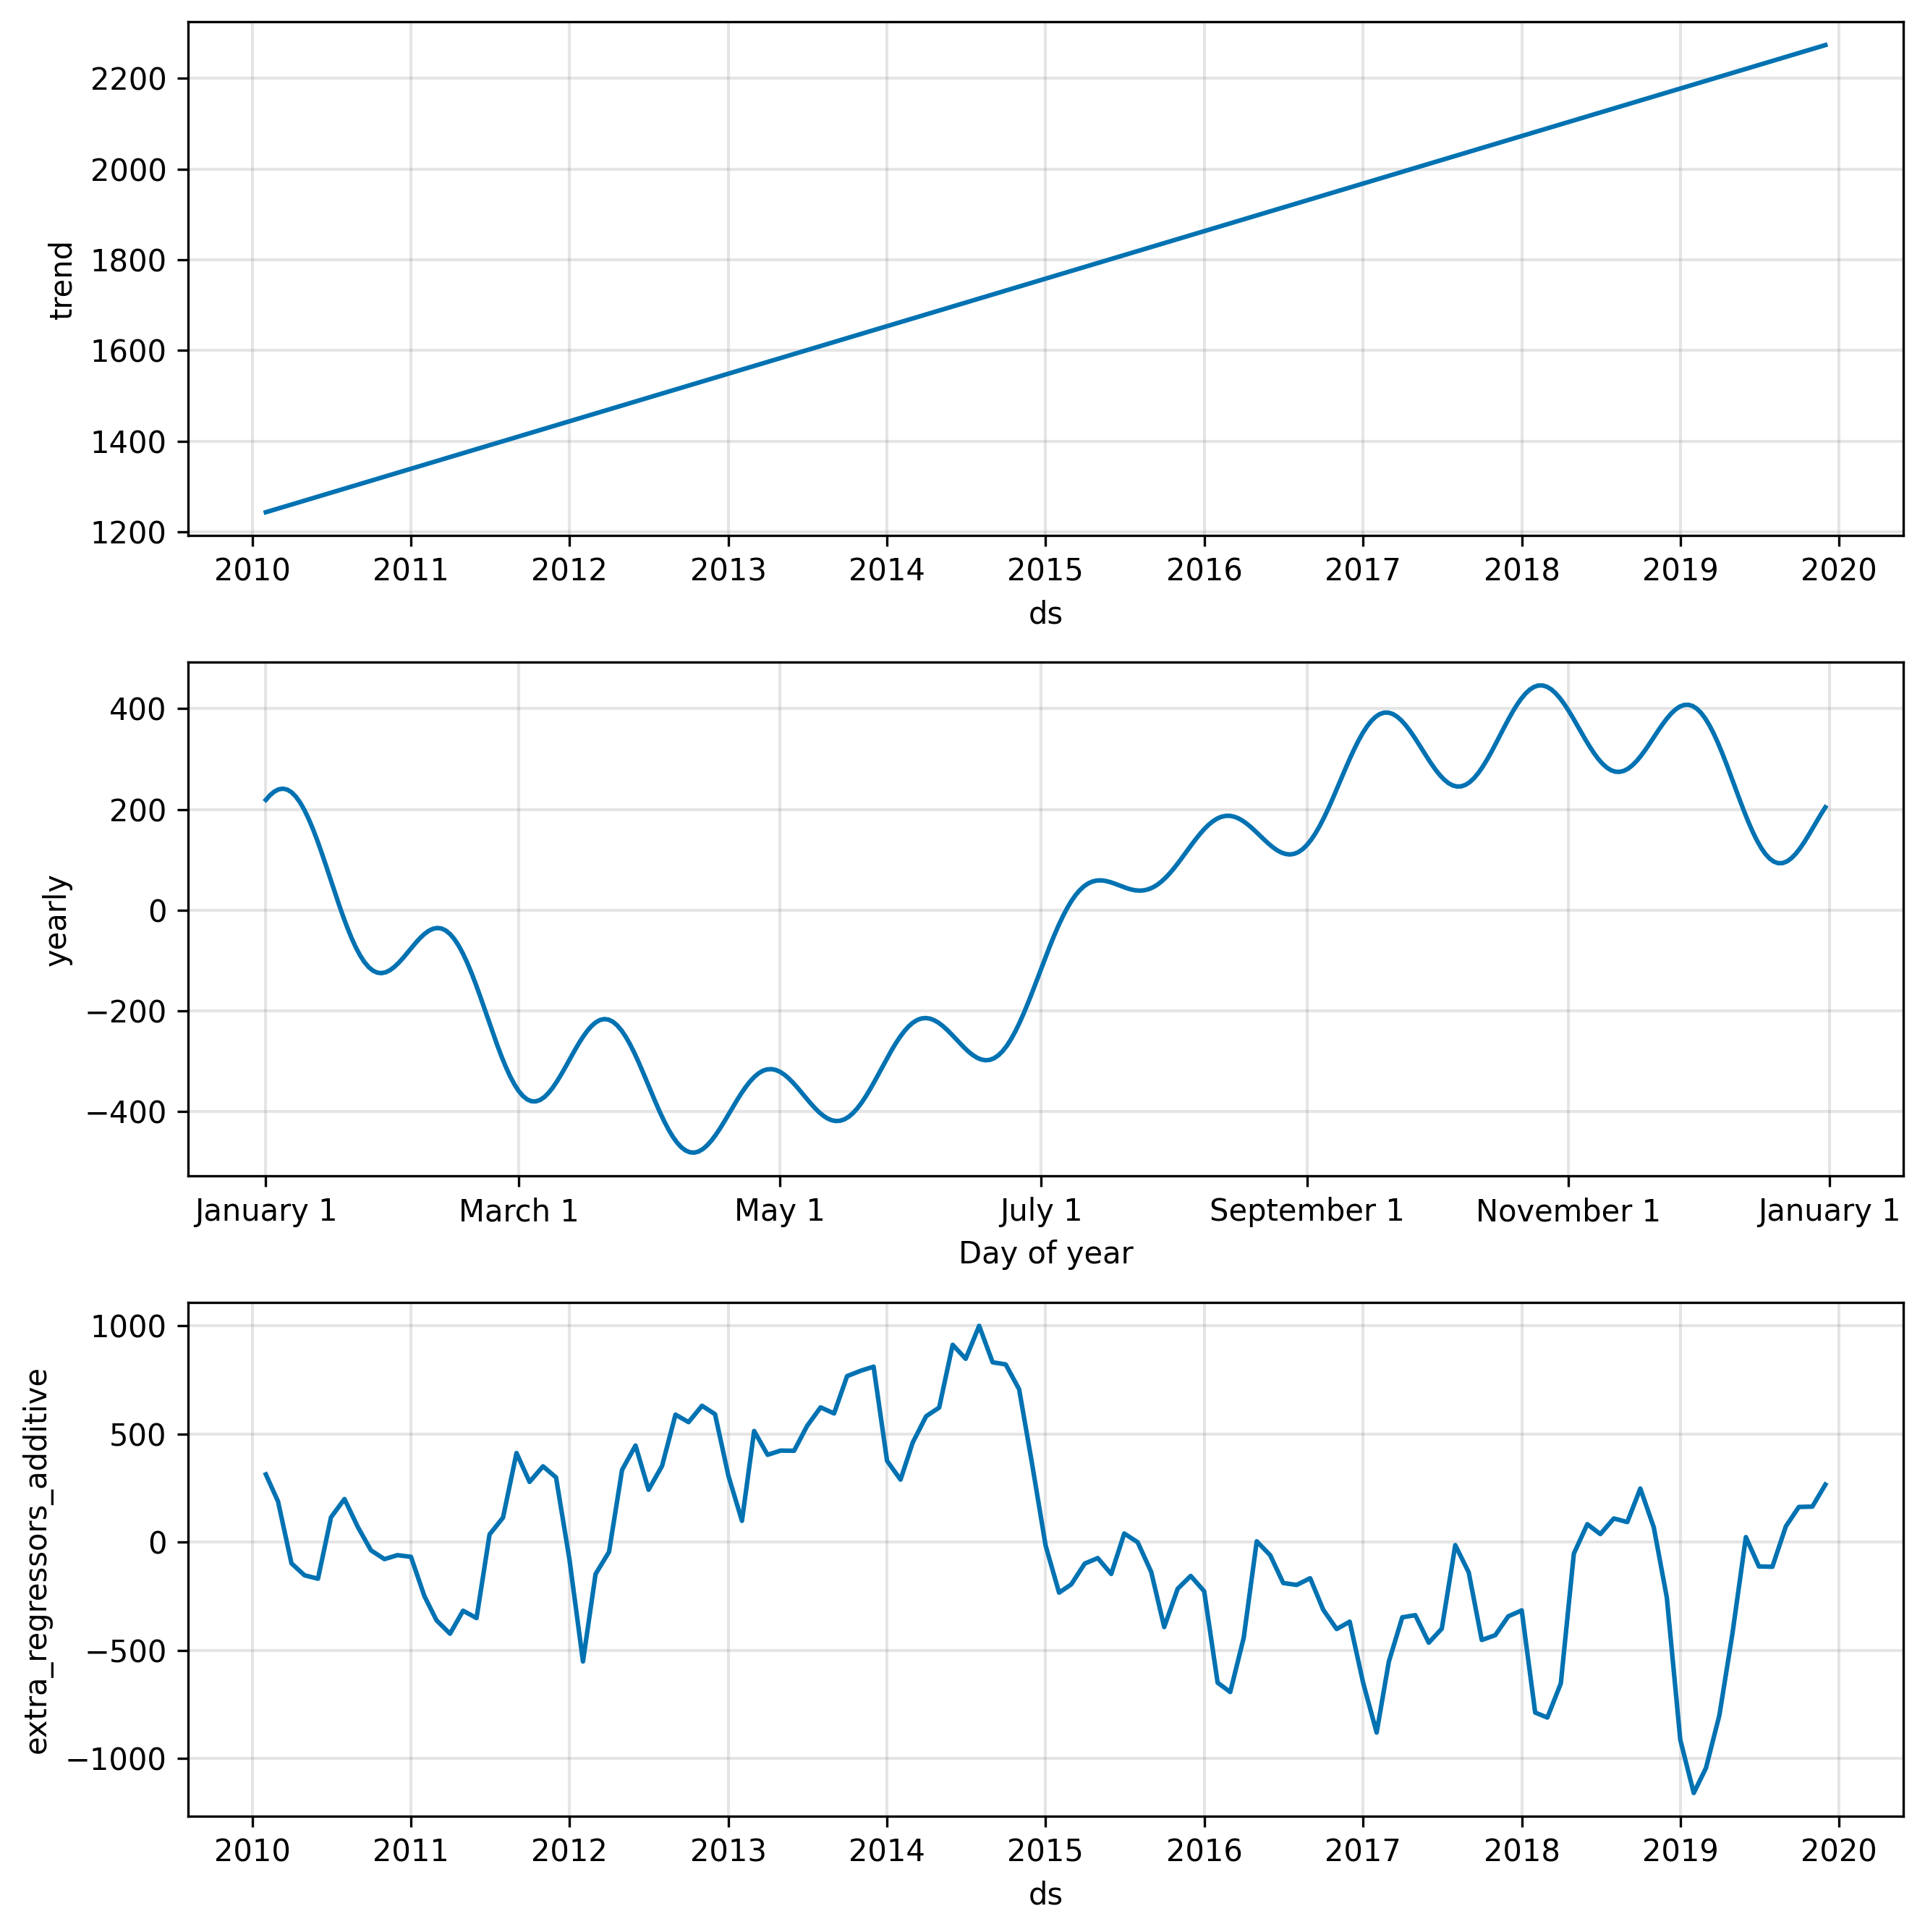

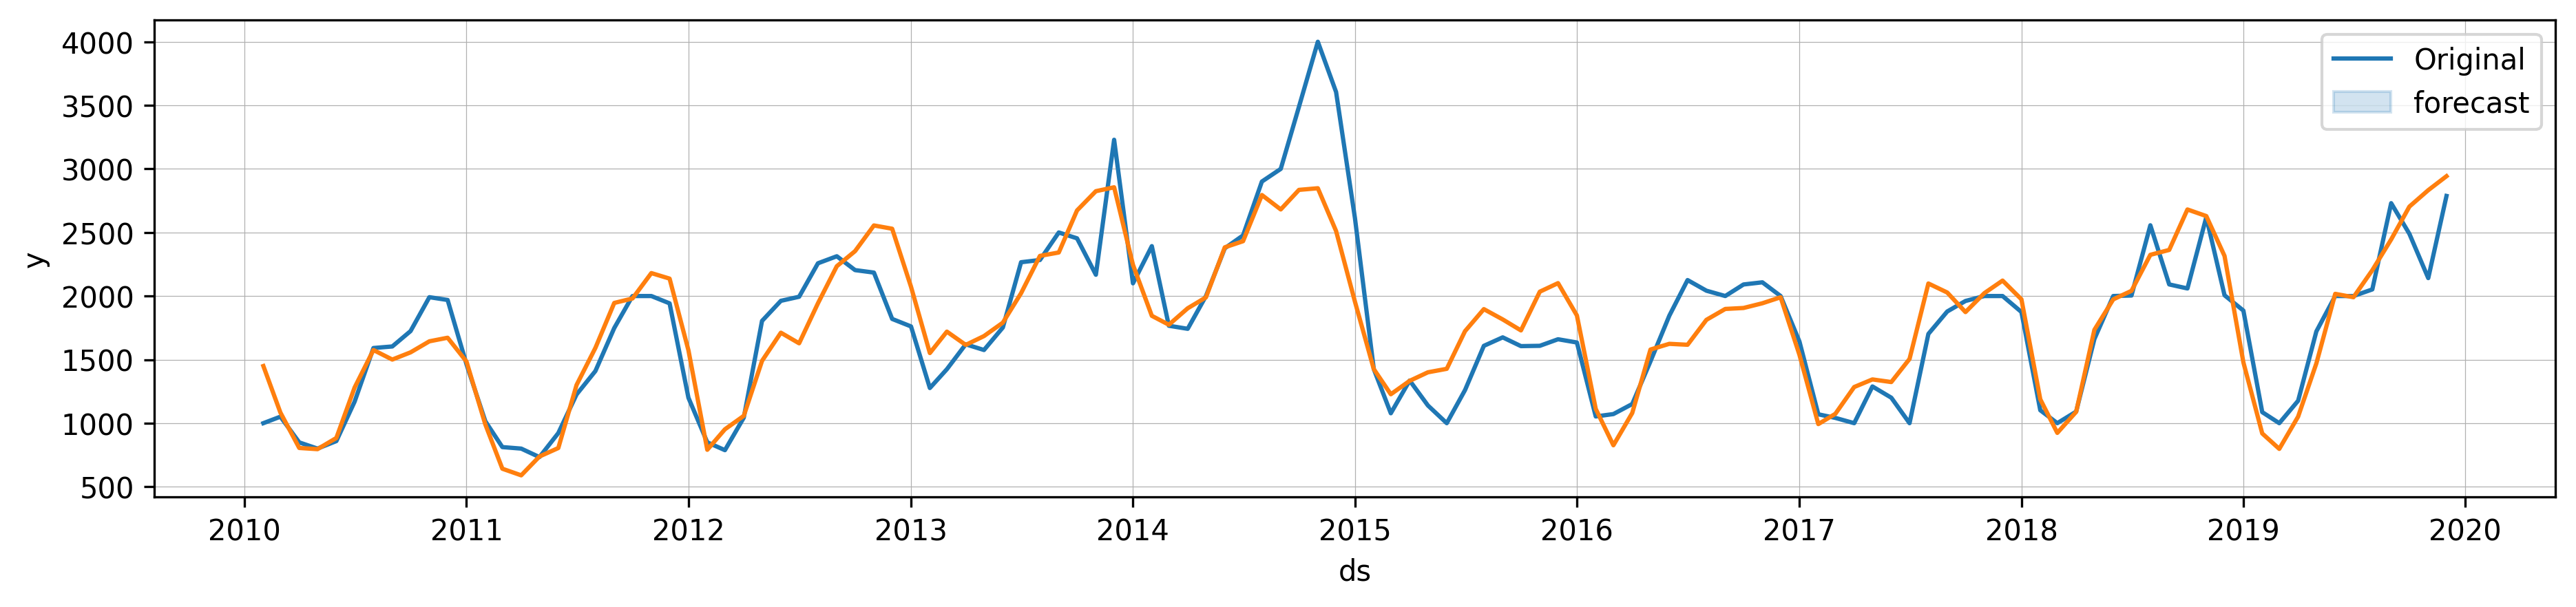

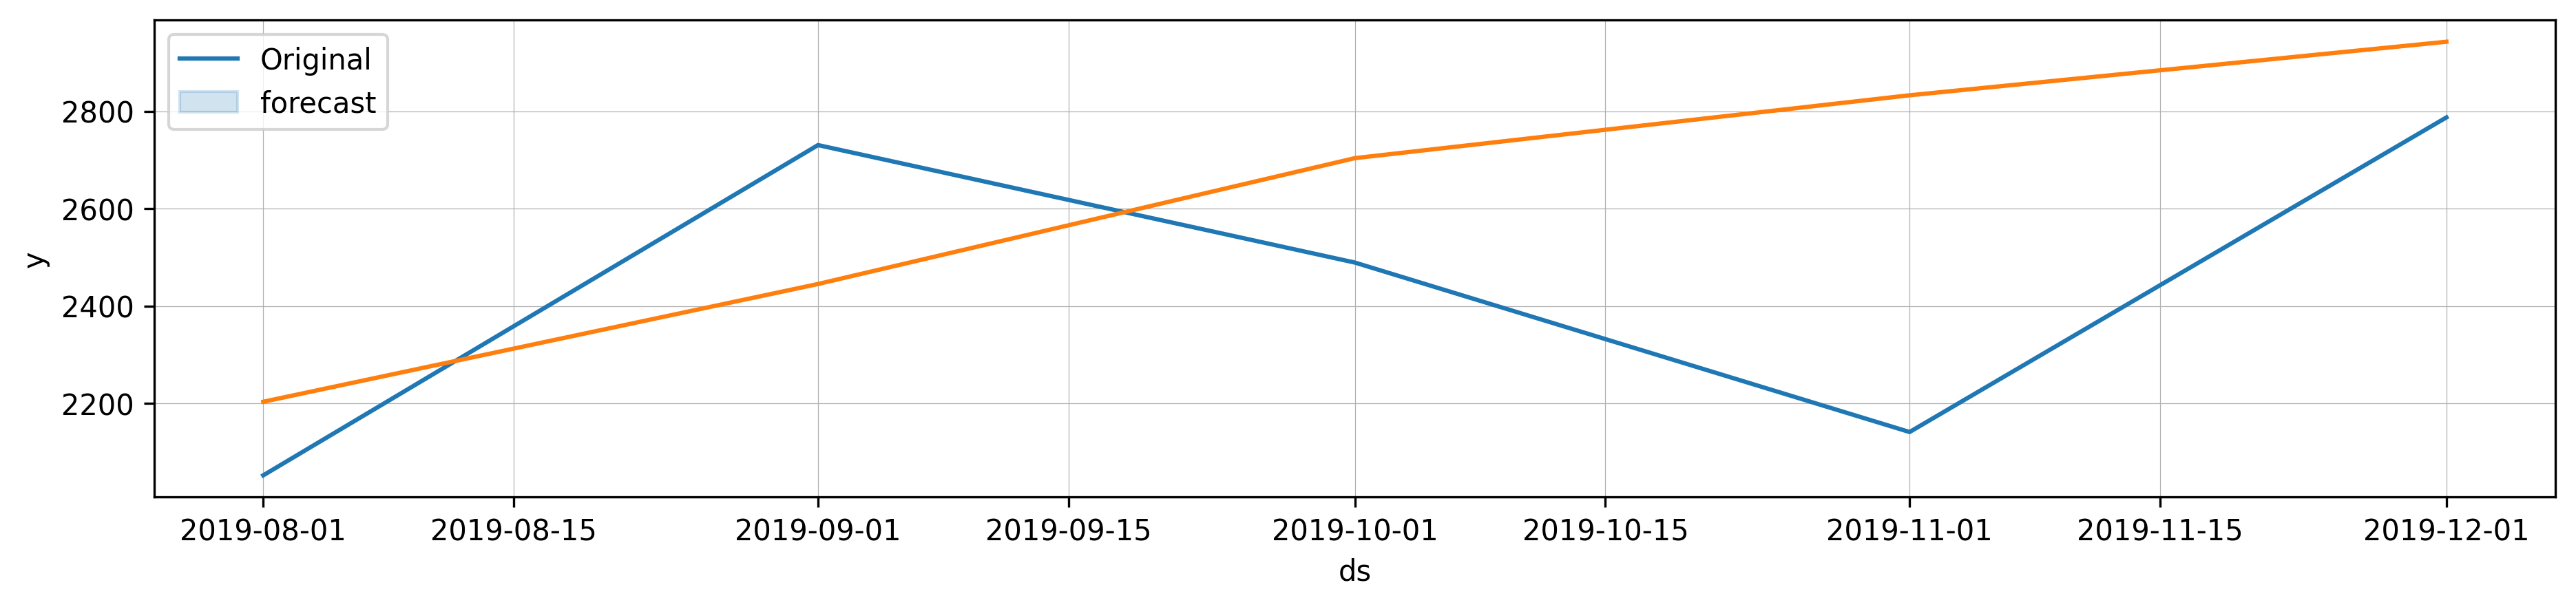

In [ ]:
MAE_Prophet_1=model_prophet(finaldf1)
